# Simulation of Physical Cavity Setup

![](images/cavity.png)

* the length of the `cavityspace` is dependent on the focal length of the mirrors
    * in our case the focal length is 10cm so the `cavityspace` will be 20cm
* whether the cavity is in resonance depends on the the exact distance between the two mirrors
    * if it's a multiple of the `laser`'s frequency the cavity will be in resonance
    * in Finesse2 this is represented by the **tuning** (phi) of a mirror

---

Small distance adjustments (nanometers) should be accomplished via changing the tuning of a component, large adjustments via the length parameter of a space.
**Small adjustments will NOT work via the length parameter!**

## High Reflectivity

* `piezomirror` R of 99,7%
* `lambda` for phi is set in [kat.ini](kat.ini) (in our case: `lambda 6.33E-7`, 633 nanometers)
* `piezomirror`: a positive phi moves the mirror `node4` closer to `node3`

--------------------------------------------------------------
Running kat - Started at 2022-05-02 20:15:02.001744
Used Finesse 2.3.1 at finesse_linux/kat


100% | ETA:  0:00:00 | Calculating                                                                                   


Finished in 0.210077 seconds


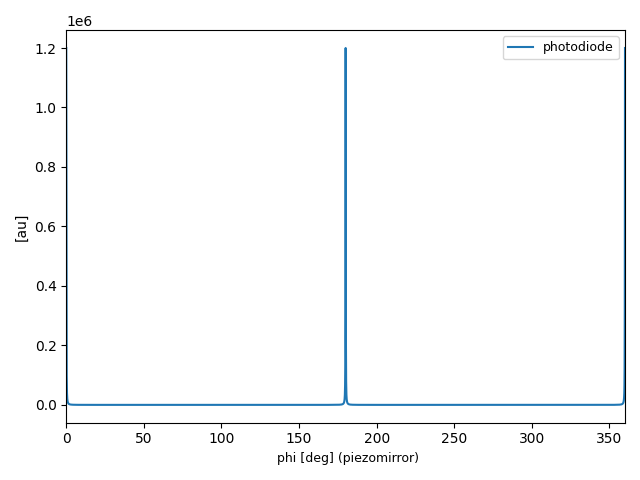

In [2]:
%matplotlib widget

from pykat import finesse
from pykat.commands import *

kat = finesse.kat()

reflectivity = 0.997
code = f"""
l laser 1.2M 0 node0
s prespace 0.1 node0 node1
m fixedmirror 0.997 0.003 0 node1 node2
s cavityspace 0.2 node2 node3
m piezomirror {reflectivity} {1-reflectivity} 0 node3 node4
pd photodiode node4

xaxis piezomirror phi lin 0 360 10_000
"""

kat.parse(code)
out = kat.run()
fig = out.plot(return_fig=True)
fig.set_figheight(5)
fig.set_figwidth(11)

## Low Reflectivity


* `piezomirror` R of 90%
* a lower reflectivity reduces the power output of the cavity

In [2]:
%matplotlib widget

from pykat import finesse
from pykat.commands import *
import matplotlib.pyplot as plt

kat = finesse.kat()
reflectivity = 0.9

code = f"""
l laser 1.2M 0 node0
s prespace 0.1 node0 node1
m fixedmirror 0.997 0.003 0 node1 node2
s cavityspace 0.2 node2 node3
m piezomirror {reflectivity} {1-reflectivity} 0 node3 node4
pd photodiode node4

xaxis piezomirror phi lin 0 360 10_000
"""

kat.parse(code)
out = kat.run()
fig = out.plot(return_fig=True)
fig.set_figheight(5)
fig.set_figwidth(11)

AttributeError: module 'collections' has no attribute 'Container'

In [ ]:
from IPython.display import display
import ipywidgets as widgets

switch = True

button = widgets.Button(description="toggle scaling")
output = widgets.Output()

display(button, output)


def on_button_clicked(b):
    global switch
    if switch:
        plt.ylim(top=1259999.864594087)
    else:
        plt.ylim(top=135888.67754189012)
    switch = not switch


button.on_click(on_button_clicked)

## Reflectivity with phi == 0

When **phi** is zero degress the cavity is in perfect resonance.

* phi is fixed to zero
* the reflectivity of `piezomirror` is swept from 90% to 100%
* 1.000 steps
* higher reflectivity leads to exponentially more cavity power output

In [ ]:
%matplotlib widget

from pykat import finesse
from pykat.commands import *

kat = finesse.kat()
code = """
l laser 1.2M 0 node0
s prespace 0.1 node0 node1
m fixedmirror 0.997 0.003 0 node1 node2
s cavityspace 0.2 node2 node3
m piezomirror .997 .003 0 node3 node4
pd photodiode node4

xaxis piezomirror R lin .9 1 1_000
"""

kat.parse(code)
out = kat.run()
fig = out.plot(return_fig=True)
fig.set_figheight(5)
fig.set_figwidth(11)
print(kat.laser.P)

## Laser power at phi==0

* phi is fixed to zero
* the power output of `laser` is swept from 0 to 3 Megawatts
* higher power input leads to a linear increase of cavity power output
* 1.000 steps

In [ ]:
%matplotlib widget

from pykat import finesse
from pykat import finesse
from pykat.commands import *

kat = finesse.kat()
code = """
l laser 1.2M 0 node0
s prespace 0.1 node0 node1
m fixedmirror 0.997 0.003 0 node1 node2
s cavityspace 0.2 node2 node3
m piezomirror .997 .003 0 node3 node4
pd photodiode node4

xaxis laser P lin 0 3M 1_000
"""

kat.parse(code)
out = kat.run()
fig = out.plot(return_fig=True)
fig.set_figheight(5)
fig.set_figwidth(11)
print(kat.laser.P)